# Fixing UAC Geometries

In [1]:
import pandas as pd
import geopandas as gpd

## Import shapefile

In [2]:
uac_errors = gpd.read_file('UAC_Errors.shp')

In [3]:
uac_errors.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World - 85°S to 85°N
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

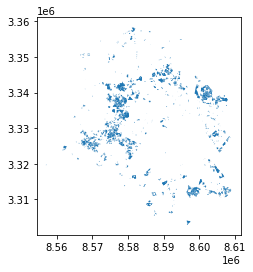

In [4]:
uac_errors.plot()

## Identify error polygons

In [5]:
uac_errors.head()

,map_no,registrati,fme_databa,index,Type,PART_COUNT,Shape_Leng,Shape_Area,geometry
0,520.0,570,D:\UC Downloads\UC_501-600-Done\520_570.pdf,0.0,Unauthorized Colony,1.0,5500.763921,175254.764123,"POLYGON ((8568698.722 3350778.289, 8568688.910..."
1,509.0,888,D:\UC Downloads\UC_501-600-Done\509_888.pdf,1.0,Unauthorized Colony,1.0,3319.735554,157342.929511,"POLYGON ((8580894.911 3343225.741, 8580905.114..."
2,516.0,658,D:\UC Downloads\UC_501-600-Done\516_658.pdf,2.0,Unauthorized Colony,1.0,2238.919451,112906.793491,"POLYGON ((8574843.534 3349736.689, 8574924.630..."
3,503.0,200,D:\UC Downloads\UC_501-600-Done\503_200.pdf,3.0,Unauthorized Colony,1.0,2976.090661,97490.195007,"POLYGON ((8578433.979 3352949.941, 8578436.107..."
4,504.0,1194,D:\UC Downloads\UC_501-600-Done\504_1194.pdf,4.0,Unauthorized Colony,1.0,5018.588570,90715.315860,"POLYGON ((8579255.777 3353628.687, 8579180.169..."


In [153]:
len(uac_errors)

1513

In [147]:
uac_errors[uac_errors['PART_COUNT'] > 1.0]

,map_no,registrati,fme_databa,index,Type,PART_COUNT,Shape_Leng,Shape_Area,geometry
24,525.0,437,D:\UC Downloads\UC_501-600-Done\525_437.pdf,25.0,Unauthorized Colony,8.0,1066.617532,154.290807,"MULTIPOLYGON (((8572276.070 3354557.454, 85722..."
33,191.0,530,D:\UC Downloads\UC_171-250\191_530.pdf,40.0,Unauthorized Colony,10.0,4776.933167,2140.424938,"MULTIPOLYGON (((8591992.124 3341942.690, 85919..."
53,192.0,111,D:\UC Downloads\UC_171-250\192_111.pdf,63.0,Unauthorized Colony,12.0,3377.325203,1032.621779,"MULTIPOLYGON (((8597008.928 3337350.695, 85970..."
60,173.0,233,D:\UC Downloads\UC_171-250\173_233.pdf,70.0,Unauthorized Colony,36.0,1738.020189,316.809430,"MULTIPOLYGON (((8593450.062 3343471.134, 85934..."
62,166.0,444,D:\UC Downloads\UC_101-170-Done\166_444.pdf,74.0,Unauthorized Colony,2.0,1543.714320,312.370342,"MULTIPOLYGON (((8593893.196 3343382.779, 85938..."
...,...,...,...,...,...,...,...,...,...
1433,602.0,503,D:\UC Downloads\a-Missing Files\602_503.pdf,2316.0,Unauthorized Colony,10.0,2055.948879,718.659691,"MULTIPOLYGON (((8578564.789 3333140.742, 85785..."
1434,605.0,870,D:\UC Downloads\a-Missing Files\605_870.pdf,2318.0,Unauthorized Colony,6.0,2088.661920,653.511676,"MULTIPOLYGON (((8577974.893 3333044.373, 85779..."
1441,603.0,229,D:\UC Downloads\a-Missing Files\603_229.pdf,2327.0,Unauthorized Colony,4.0,1495.972650,210.676497,"MULTIPOLYGON (((8577910.239 3333267.659, 85779..."
1449,617.0,15-(ELD),D:\UC Downloads\a-Missing Files\617_15-(ELD).pdf,2337.0,Unauthorized Colony,2.0,429.062065,78.567177,"MULTIPOLYGON (((8586935.608 3332291.238, 85869..."


## Remove problematic polygons and put into another GeoDataFrame

In [148]:
problem_uacs = uac_errors[uac_errors['PART_COUNT'] > 1.0]

In [155]:
uac_without_problems = uac_errors.drop(index = problem_uacs.index)

In [156]:
uac_without_problems

,map_no,registrati,fme_databa,index,Type,PART_COUNT,Shape_Leng,Shape_Area,geometry
0,520.0,570,D:\UC Downloads\UC_501-600-Done\520_570.pdf,0.0,Unauthorized Colony,1.0,5500.763921,175254.764123,"POLYGON ((8568698.722 3350778.289, 8568688.910..."
1,509.0,888,D:\UC Downloads\UC_501-600-Done\509_888.pdf,1.0,Unauthorized Colony,1.0,3319.735554,157342.929511,"POLYGON ((8580894.911 3343225.741, 8580905.114..."
2,516.0,658,D:\UC Downloads\UC_501-600-Done\516_658.pdf,2.0,Unauthorized Colony,1.0,2238.919451,112906.793491,"POLYGON ((8574843.534 3349736.689, 8574924.630..."
3,503.0,200,D:\UC Downloads\UC_501-600-Done\503_200.pdf,3.0,Unauthorized Colony,1.0,2976.090661,97490.195007,"POLYGON ((8578433.979 3352949.941, 8578436.107..."
4,504.0,1194,D:\UC Downloads\UC_501-600-Done\504_1194.pdf,4.0,Unauthorized Colony,1.0,5018.588570,90715.315860,"POLYGON ((8579255.777 3353628.687, 8579180.169..."
...,...,...,...,...,...,...,...,...,...
1508,1257.0,724,D:\UC Downloads\Incomplete polygons\1257_724.pdf,2460.0,Unauthorized Colony,1.0,1224.100937,81367.786541,"POLYGON ((8603999.322 3332808.838, 8604078.548..."
1509,27.0,167,D:\UC Downloads\Incomplete polygons\27_167.pdf,2461.0,Unauthorized Colony,1.0,1017.870166,40665.656805,"POLYGON ((8576522.039 3336941.191, 8576576.418..."
1510,1161.0,625,D:\UC Downloads\Incomplete polygons\1161_625.pdf,2462.0,Unauthorized Colony,1.0,723.163365,20497.123631,"POLYGON ((8576663.032 3336801.506, 8576647.696..."
1511,882.0,218,D:\UC Downloads\Incomplete polygons\882_218.pdf,2463.0,Unauthorized Colony,1.0,4991.346070,184704.837638,"POLYGON ((8575193.159 3341022.052, 8575195.388..."


In [180]:
problem_uacs['new_geom'] = None
problem_uacs.head()

C:\Users\bwbel\miniconda3\envs\gis\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,map_no,registrati,fme_databa,index,Type,PART_COUNT,Shape_Leng,Shape_Area,geometry,new_geom
24,525.0,437,D:\UC Downloads\UC_501-600-Done\525_437.pdf,25.0,Unauthorized Colony,8.0,1066.617532,154.290807,"MULTIPOLYGON (((8572276.070 3354557.454, 85722...",None
33,191.0,530,D:\UC Downloads\UC_171-250\191_530.pdf,40.0,Unauthorized Colony,10.0,4776.933167,2140.424938,"MULTIPOLYGON (((8591992.124 3341942.690, 85919...",None
53,192.0,111,D:\UC Downloads\UC_171-250\192_111.pdf,63.0,Unauthorized Colony,12.0,3377.325203,1032.621779,"MULTIPOLYGON (((8597008.928 3337350.695, 85970...",None
60,173.0,233,D:\UC Downloads\UC_171-250\173_233.pdf,70.0,Unauthorized Colony,36.0,1738.020189,316.809430,"MULTIPOLYGON (((8593450.062 3343471.134, 85934...",None
62,166.0,444,D:\UC Downloads\UC_101-170-Done\166_444.pdf,74.0,Unauthorized Colony,2.0,1543.714320,312.370342,"MULTIPOLYGON (((8593893.196 3343382.779, 85938...",None


In [177]:
new_poly_geoms = []
for index, row in problem_uacs.iterrows():
    if row['map_no'] != 1469:
        new_geom = Polygon(row['geometry'].buffer(0.0001).exterior.coords)
    else:
        new_geom = row['geometry']
    new_poly_geoms.append(new_geom)

In [178]:
len(new_poly_geoms)

179

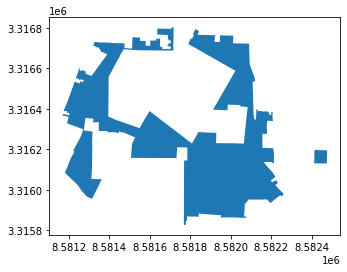

In [176]:
problem_uacs[problem_uacs['map_no'] == 1469]['geometry'].buffer(0.0001).plot()

In [181]:
problem_uacs['new_geom'] = new_poly_geoms

C:\Users\bwbel\miniconda3\envs\gis\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [182]:
problem_uacs

,map_no,registrati,fme_databa,index,Type,PART_COUNT,Shape_Leng,Shape_Area,geometry,new_geom
24,525.0,437,D:\UC Downloads\UC_501-600-Done\525_437.pdf,25.0,Unauthorized Colony,8.0,1066.617532,154.290807,"MULTIPOLYGON (((8572276.070 3354557.454, 85722...","POLYGON ((8572276.069695253 3354557.45440011, ..."
33,191.0,530,D:\UC Downloads\UC_171-250\191_530.pdf,40.0,Unauthorized Colony,10.0,4776.933167,2140.424938,"MULTIPOLYGON (((8591992.124 3341942.690, 85919...","POLYGON ((8591280.1304173 3342539.112761335, 8..."
53,192.0,111,D:\UC Downloads\UC_171-250\192_111.pdf,63.0,Unauthorized Colony,12.0,3377.325203,1032.621779,"MULTIPOLYGON (((8597008.928 3337350.695, 85970...","POLYGON ((8596999.843594925 3337443.942595286,..."
60,173.0,233,D:\UC Downloads\UC_171-250\173_233.pdf,70.0,Unauthorized Colony,36.0,1738.020189,316.809430,"MULTIPOLYGON (((8593450.062 3343471.134, 85934...","POLYGON ((8593272.433593586 3343447.367301947,..."
62,166.0,444,D:\UC Downloads\UC_101-170-Done\166_444.pdf,74.0,Unauthorized Colony,2.0,1543.714320,312.370342,"MULTIPOLYGON (((8593893.196 3343382.779, 85938...","POLYGON ((8593893.195900304 3343382.778600002,..."
...,...,...,...,...,...,...,...,...,...,...
1433,602.0,503,D:\UC Downloads\a-Missing Files\602_503.pdf,2316.0,Unauthorized Colony,10.0,2055.948879,718.659691,"MULTIPOLYGON (((8578564.789 3333140.742, 85785...","POLYGON ((8578318.502117736 3333201.623688866,..."
1434,605.0,870,D:\UC Downloads\a-Missing Files\605_870.pdf,2318.0,Unauthorized Colony,6.0,2088.661920,653.511676,"MULTIPOLYGON (((8577974.893 3333044.373, 85779...","POLYGON ((8577971.688297117 3332957.657099248,..."
1441,603.0,229,D:\UC Downloads\a-Missing Files\603_229.pdf,2327.0,Unauthorized Colony,4.0,1495.972650,210.676497,"MULTIPOLYGON (((8577910.239 3333267.659, 85779...","POLYGON ((8577910.2389 3333267.658800059, 8577..."
1449,617.0,15-(ELD),D:\UC Downloads\a-Missing Files\617_15-(ELD).pdf,2337.0,Unauthorized Colony,2.0,429.062065,78.567177,"MULTIPOLYGON (((8586935.608 3332291.238, 85869...","POLYGON ((8586876.7489 3332309.61947, 8586870...."


In [183]:
problem_uacs = problem_uacs.drop(columns=['geometry'])

In [184]:
problem_uacs

,map_no,registrati,fme_databa,index,Type,PART_COUNT,Shape_Leng,Shape_Area,new_geom
24,525.0,437,D:\UC Downloads\UC_501-600-Done\525_437.pdf,25.0,Unauthorized Colony,8.0,1066.617532,154.290807,"POLYGON ((8572276.069695253 3354557.45440011, ..."
33,191.0,530,D:\UC Downloads\UC_171-250\191_530.pdf,40.0,Unauthorized Colony,10.0,4776.933167,2140.424938,"POLYGON ((8591280.1304173 3342539.112761335, 8..."
53,192.0,111,D:\UC Downloads\UC_171-250\192_111.pdf,63.0,Unauthorized Colony,12.0,3377.325203,1032.621779,"POLYGON ((8596999.843594925 3337443.942595286,..."
60,173.0,233,D:\UC Downloads\UC_171-250\173_233.pdf,70.0,Unauthorized Colony,36.0,1738.020189,316.809430,"POLYGON ((8593272.433593586 3343447.367301947,..."
62,166.0,444,D:\UC Downloads\UC_101-170-Done\166_444.pdf,74.0,Unauthorized Colony,2.0,1543.714320,312.370342,"POLYGON ((8593893.195900304 3343382.778600002,..."
...,...,...,...,...,...,...,...,...,...
1433,602.0,503,D:\UC Downloads\a-Missing Files\602_503.pdf,2316.0,Unauthorized Colony,10.0,2055.948879,718.659691,"POLYGON ((8578318.502117736 3333201.623688866,..."
1434,605.0,870,D:\UC Downloads\a-Missing Files\605_870.pdf,2318.0,Unauthorized Colony,6.0,2088.661920,653.511676,"POLYGON ((8577971.688297117 3332957.657099248,..."
1441,603.0,229,D:\UC Downloads\a-Missing Files\603_229.pdf,2327.0,Unauthorized Colony,4.0,1495.972650,210.676497,"POLYGON ((8577910.2389 3333267.658800059, 8577..."
1449,617.0,15-(ELD),D:\UC Downloads\a-Missing Files\617_15-(ELD).pdf,2337.0,Unauthorized Colony,2.0,429.062065,78.567177,"POLYGON ((8586876.7489 3332309.61947, 8586870...."


In [185]:
problem_uacs = problem_uacs.rename(columns={'new_geom':'geometry'})

In [186]:
problem_uacs.head()

,map_no,registrati,fme_databa,index,Type,PART_COUNT,Shape_Leng,Shape_Area,geometry
24,525.0,437,D:\UC Downloads\UC_501-600-Done\525_437.pdf,25.0,Unauthorized Colony,8.0,1066.617532,154.290807,"POLYGON ((8572276.070 3354557.454, 8572276.070..."
33,191.0,530,D:\UC Downloads\UC_171-250\191_530.pdf,40.0,Unauthorized Colony,10.0,4776.933167,2140.424938,"POLYGON ((8591280.130 3342539.113, 8591279.588..."
53,192.0,111,D:\UC Downloads\UC_171-250\192_111.pdf,63.0,Unauthorized Colony,12.0,3377.325203,1032.621779,"POLYGON ((8596999.844 3337443.943, 8596998.091..."
60,173.0,233,D:\UC Downloads\UC_171-250\173_233.pdf,70.0,Unauthorized Colony,36.0,1738.020189,316.809430,"POLYGON ((8593272.434 3343447.367, 8593272.390..."
62,166.0,444,D:\UC Downloads\UC_101-170-Done\166_444.pdf,74.0,Unauthorized Colony,2.0,1543.714320,312.370342,"POLYGON ((8593893.196 3343382.779, 8593893.196..."


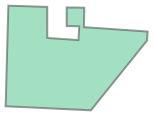

In [188]:
problem_uacs.iloc[0]['geometry']

## Merge files

In [190]:
almost_corrected_uac = gpd.GeoDataFrame(pd.concat([problem_uacs, uac_without_problems]), crs=uac_without_problems.crs, geometry='geometry')

In [191]:
almost_corrected_uac

,map_no,registrati,fme_databa,index,Type,PART_COUNT,Shape_Leng,Shape_Area,geometry
24,525.0,437,D:\UC Downloads\UC_501-600-Done\525_437.pdf,25.0,Unauthorized Colony,8.0,1066.617532,154.290807,"POLYGON ((8572276.070 3354557.454, 8572276.070..."
33,191.0,530,D:\UC Downloads\UC_171-250\191_530.pdf,40.0,Unauthorized Colony,10.0,4776.933167,2140.424938,"POLYGON ((8591280.130 3342539.113, 8591279.588..."
53,192.0,111,D:\UC Downloads\UC_171-250\192_111.pdf,63.0,Unauthorized Colony,12.0,3377.325203,1032.621779,"POLYGON ((8596999.844 3337443.943, 8596998.091..."
60,173.0,233,D:\UC Downloads\UC_171-250\173_233.pdf,70.0,Unauthorized Colony,36.0,1738.020189,316.809430,"POLYGON ((8593272.434 3343447.367, 8593272.390..."
62,166.0,444,D:\UC Downloads\UC_101-170-Done\166_444.pdf,74.0,Unauthorized Colony,2.0,1543.714320,312.370342,"POLYGON ((8593893.196 3343382.779, 8593893.196..."
...,...,...,...,...,...,...,...,...,...
1508,1257.0,724,D:\UC Downloads\Incomplete polygons\1257_724.pdf,2460.0,Unauthorized Colony,1.0,1224.100937,81367.786541,"POLYGON ((8603999.322 3332808.838, 8604078.548..."
1509,27.0,167,D:\UC Downloads\Incomplete polygons\27_167.pdf,2461.0,Unauthorized Colony,1.0,1017.870166,40665.656805,"POLYGON ((8576522.039 3336941.191, 8576576.418..."
1510,1161.0,625,D:\UC Downloads\Incomplete polygons\1161_625.pdf,2462.0,Unauthorized Colony,1.0,723.163365,20497.123631,"POLYGON ((8576663.032 3336801.506, 8576647.696..."
1511,882.0,218,D:\UC Downloads\Incomplete polygons\882_218.pdf,2463.0,Unauthorized Colony,1.0,4991.346070,184704.837638,"POLYGON ((8575193.159 3341022.052, 8575195.388..."


In [192]:
almost_corrected_uac.to_file('near_perfect_uac.shp')